 ## Анализ данных об оптовых продажах аудиотехники

## Подготовка данных

**Соберем датасет с заказами по папкам**

1.  **Создадим `df_orders`** на основе `orders.csv` с добавлением колонки `manager` (имена менеджеров) и колонки `date` (даты). Отсортируем датафрейм по возрастанию `order_id` и `product_id`.

2.  **Создадим `df_order_status`** на основе `order_status.csv`. Отсортируем датафрейм по возрастанию `order_id`.

3.  **Создадим `df_products`** на основе `products.csv` с добавлением колонки `category` (категории товаров). Отсортируем датафрейм по возрастанию `id`.

In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-olga-pikul-jrt5834/python/homework/data/orders/'
df_orders = pd.DataFrame()
df_order_status = pd.DataFrame()
for root, dirs, files in os.walk(path):
    if files:
        orders = pd.read_csv(os.path.join(root, files[1]))
        orders['manager'] = root.split('/')[-1]
        orders['date'] = root.split('/')[-2]
        df_orders = pd.concat([df_orders, orders])
        order_status = pd.read_csv(os.path.join(root, files[0]))
        df_order_status = pd.concat([df_order_status, order_status])

In [4]:
df_products = pd.DataFrame()
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-olga-pikul-jrt5834/python/homework/data/products/'
for root, dirs, files in os.walk(path):
    if files:
        products = pd.read_csv(os.path.join(root, files[0]))
        products['category'] = root.split('/')[-1]
        df_products = pd.concat([df_products, products])

**Проверим, что получилось**

In [5]:
df_order_status.head()

,order_id,client_id,status
0,DUEU-27693834,14,confirmed
0,VHJV-14331014,43,confirmed
0,MSXQ-45152143,61,confirmed
1,LOSS-76956574,94,confirmed
2,OPAU-19106120,33,confirmed


In [6]:
df_orders.head()

,order_id,product_id,quantity,manager,date
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01


In [7]:
df_products.head()

,id,name,price,category
0,36,"Anthem, AVM 70",2580.03,AV-процессор
1,40,"Arcam, AV860",3400.64,AV-процессор
2,41,"Arcam, AVR30",3600.85,AV-процессор
3,205,"Denon, AVC-X8500H",3600.95,AV-процессор
4,206,"Denon, AVC-X6700H",2225.50,AV-процессор


**Отсортируем датафреймы и перезапишем индексы**

In [8]:
df_orders = df_orders.sort_values(['order_id', 'product_id']).reset_index(drop=True)
df_orders.head()

,order_id,product_id,quantity,manager,date
0,ABID-18767701,72,30,Маргарита Камертонова,2024-03-11
1,ABID-18767701,509,40,Маргарита Камертонова,2024-03-11
2,ABID-18767701,555,26,Маргарита Камертонова,2024-03-11
3,ABID-18767701,557,30,Маргарита Камертонова,2024-03-11
4,ABID-18767701,569,28,Маргарита Камертонова,2024-03-11


In [9]:
df_order_status = df_order_status.sort_values('order_id').reset_index(drop=True)
df_order_status.head()

,order_id,client_id,status
0,ABID-18767701,44,confirmed
1,ACXS-56511429,24,confirmed
2,AEDO-27030558,22,confirmed
3,AFIH-00611801,43,canceled
4,AFUU-55889181,88,confirmed


In [10]:
df_products = df_products.sort_values('id').reset_index(drop=True)
df_products.head()

,id,name,price,category
0,1,"AKG, D5",180.46,Динамический микрофон
1,2,"AKG, D40",85.80,Динамический микрофон
2,3,"AKG, C414 XLII",935.11,Конденсаторный микрофон
3,4,"AKG, C214",356.02,Конденсаторный микрофон
4,5,"AKG, P120",86.13,Конденсаторный микрофон


**Посмотрим на тип данных в таблицах**

In [11]:
print(df_orders.dtypes, '\n')
print(df_products.dtypes, '\n')
print(df_order_status.dtypes)

order_id      object
product_id     int64
quantity       int64
manager       object
date          object
dtype: object 

id            int64
name         object
price       float64
category     object
dtype: object 

order_id     object
client_id     int64
status       object
dtype: object


**Заметим, что дата представлена как object. Переведем ее в datetime64[ns]**

In [12]:
df_orders['date'] = pd.to_datetime(df_orders['date'])

## Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

**Создадим таблицу** с количеством заказов в каждый день и выведим топ-5 по заказам


In [13]:
df_orders_by_date = df_orders.groupby('date', as_index=False)\
                            .aggregate({'order_id': 'nunique'})\
                            .rename(columns={'order_id':'orders'})
df_orders_by_date.sort_values('orders', ascending=False).head()

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18


**Анализ сезонности в данных о заказах:**

1.  **Построим график** с количеством заказов по дням.
2.  **Проанализируем график** на наличие сезонности в данных.

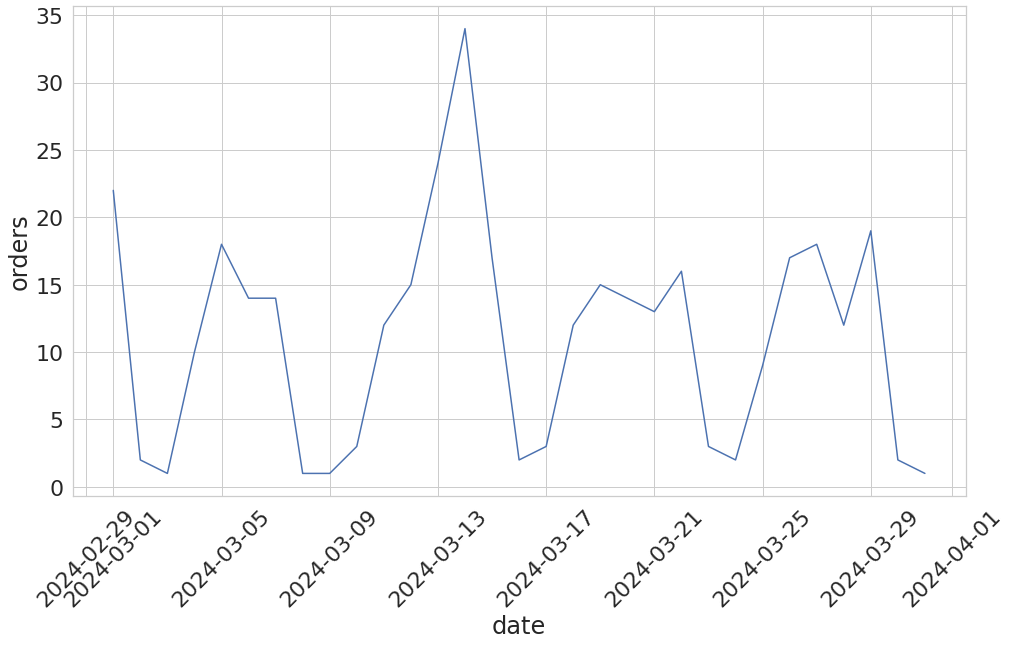

In [14]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(16, 9)}
        )

sns.lineplot(data=df_orders_by_date, x='date', y='orders');
plt.xticks(rotation=45);

**Действительно, можно заметить сезонность**: по выходным почти нет заказов
**Также можно заметить интересную особанность**: обычно по пятницам много заказов, но на одной их почти нет, это 8 марта, праздничный день.

## Изучим возможные причины резкого роста заказов:

**Анализ дня с пиком заказов:**

**Создадим общий датафрейм `orders_status`**, объединив данные о заказах с информацией об их статусах.

In [15]:
orders_status = df_orders.merge(df_order_status, on = 'order_id')
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,ABID-18767701,72,30,Маргарита Камертонова,2024-03-11,44,confirmed
1,ABID-18767701,509,40,Маргарита Камертонова,2024-03-11,44,confirmed
2,ABID-18767701,555,26,Маргарита Камертонова,2024-03-11,44,confirmed
3,ABID-18767701,557,30,Маргарита Камертонова,2024-03-11,44,confirmed
4,ABID-18767701,569,28,Маргарита Камертонова,2024-03-11,44,confirmed
...,...,...,...,...,...,...,...
4598,ZVTW-19610380,1171,28,Ксения Балалайкина,2024-03-22,44,confirmed
4599,ZVTW-19610380,1308,4,Ксения Балалайкина,2024-03-22,44,confirmed
4600,ZVTW-19610380,1476,4,Ксения Балалайкина,2024-03-22,44,confirmed
4601,ZVTW-19610380,1517,11,Ксения Балалайкина,2024-03-22,44,confirmed


**Посмотрим на количество и соотношение подтвержденных и отмененных заказов.**

In [16]:
status = orders_status.status.value_counts().reset_index()
status

,index,status
0,confirmed,4083
1,canceled,520


In [17]:
status['per'] = (status['status'] / status['status'].sum()).round(2)
status

,index,status,per
0,confirmed,4083,0.89
1,canceled,520,0.11


**Анализ статусов заказов по дням:**

1.  **Создадим сводную таблицу**, где:
    - в строках будут даты
    - в колонках — статусы заказов  
    - значения — количество заказов с каждым статусом на дату

2.  **Заполним пропуски нулями**

3.  **Определим день**, в который не было ни одного подтвержденного заказа

4.  **Проанализируем распределение** подтвержденных и отмененных заказов по датам

In [18]:
df_orders_by_date_status = orders_status.groupby(['date', 'status'], as_index=False)\
                            .aggregate({'order_id': 'nunique'})\
                            .rename(columns={'order_id':'orders'})
df_orders_by_date_status.head()

,date,status,orders
0,2024-03-01,canceled,2
1,2024-03-01,confirmed,20
2,2024-03-02,confirmed,2
3,2024-03-03,confirmed,1
4,2024-03-04,confirmed,10


In [19]:
pivot_df = pd.pivot_table(df_orders_by_date_status, 
                      values='orders',
                      index='date',
                      columns='status'
                      ).reset_index().fillna(0)
pivot_df.head()

status,date,canceled,confirmed
0,2024-03-01,2.0,20.0
1,2024-03-02,0.0,2.0
2,2024-03-03,0.0,1.0
3,2024-03-04,0.0,10.0
4,2024-03-05,0.0,18.0


In [20]:
pivot_df.query('confirmed == 0')

status,date,canceled,confirmed
8,2024-03-09,1.0,0.0


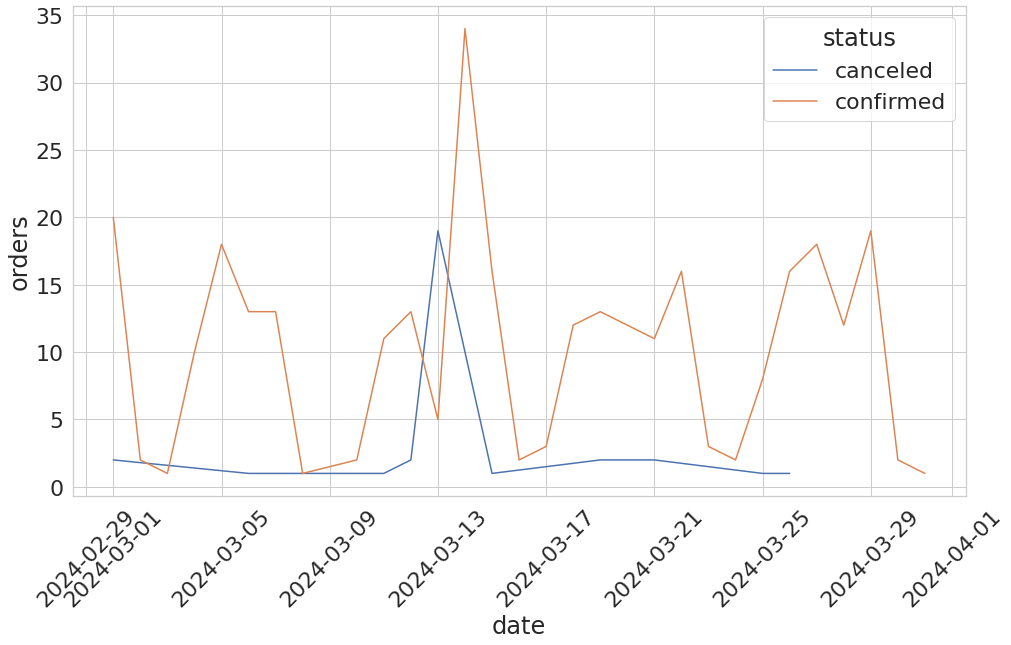

In [21]:
sns.lineplot(data=df_orders_by_date_status, x='date', y='orders', hue='status');
plt.xticks(rotation=45);

**Проанализировав график, можем сделать два вывода**: в день с наибольшим числом заказов было много успешно оформленных заказов, и в день, предшествующий дню с наибольшим числом заказов, было много отмен

**Подумаем, почему такое может быть?**

**Проанализируем заказы за эти дни**: отберем все отмененные заказы 13 марта и все подтвержденные заказы 14 марта(день, когда было наибольшее число заказов

In [22]:
df_canceled_march_13 = orders_status\
    .loc[(orders_status['date'] == '2024-03-13') & (orders_status['status'] == 'canceled')] \
    .groupby(['order_id'], as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})

df_canceled_march_13.head()

,order_id,product_id,manager,client_id,quantity
0,AFIH-00611801,11,Алексей Саксофонов,43,192
1,BBFJ-27674101,14,Ксения Балалайкина,73,294
2,CLBQ-63032648,13,Виктор Тромбонов,60,205
3,CYJY-07359557,13,Екатерина Тарелкина,56,316
4,GHGB-88045656,4,Ксения Балалайкина,7,42


In [23]:
df_confirmed_march_14 = orders_status\
    .loc[(orders_status['date'] == '2024-03-14') & (orders_status['status'] == 'confirmed')] \
    .groupby(['order_id'], as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})

df_confirmed_march_14.head()

,order_id,product_id,manager,client_id,quantity
0,ACXS-56511429,8,Алексей Саксофонов,24,177
1,AUZX-12706022,19,Екатерина Тарелкина,83,369
2,BCMM-97072924,17,Алексей Саксофонов,51,325
3,BGHE-44722549,8,Виктор Тромбонов,95,149
4,DMEB-71700015,12,Сергей Контрабасов,93,190


**Найдем** переоформленные заказы

In [24]:
df_canceled_and_again_confirmed = pd.merge(df_canceled_march_13, df_confirmed_march_14, 
                                  on=['product_id','manager', 'client_id', 'quantity'], 
                                  how='inner')
df_canceled_and_again_confirmed

,order_id_x,product_id,manager,client_id,quantity,order_id_y
0,AFIH-00611801,11,Алексей Саксофонов,43,192,FDEB-71487438
1,BBFJ-27674101,14,Ксения Балалайкина,73,294,UETB-44283966
2,CLBQ-63032648,13,Виктор Тромбонов,60,205,IECD-18739530
3,CYJY-07359557,13,Екатерина Тарелкина,56,316,WNMY-98871151
4,GHGB-88045656,4,Ксения Балалайкина,7,42,JUGG-73806170
5,JEIF-69283221,15,Виктор Тромбонов,94,207,EPBF-14743479
6,JQQO-28609300,15,Виктор Тромбонов,93,252,OWZC-14247946
7,KJJS-03491897,18,Алексей Саксофонов,66,399,GRCH-73394464
8,MIGZ-68487439,17,Алексей Саксофонов,51,325,BCMM-97072924
9,NBIO-35476164,14,Виктор Тромбонов,95,319,NFML-87752700


**Посчитаем** соотношение всех заказанных товаров 14 марта и переоформленных в этот день

In [25]:
df_canceled_and_again_confirmed.shape[0] / df_confirmed_march_14.shape[0]

0.47058823529411764

### Можем сделать вывод : произошел сбой в работе системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние.

## Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

**Расчет среднего курса доллара за месяц:**

1.  **Создадим датафрейм с курсами валют** из файла `usd_rate.txt` с колонками:
    - `date` - дата
    - `currency_rate` - курс доллара

2.  **Посчитаем среднее значение курса** доллара за весь месяц

3.  **Округлим результат** до двух знаков после запятой

In [26]:
p = 'usd_rate.txt'
usd_rate = open(p).readlines()
usd_rate = [usd_rate.split(',') for usd_rate in usd_rate]
usd_rate = pd.DataFrame(usd_rate, columns=['date', 'rate', 'сurrency'])
usd_rate.head()

,date,rate,сurrency
0,2024-03-01,90.8423,Доллар США\n
1,2024-03-02,91.3336,Доллар США\n
2,2024-03-03,91.3336,Доллар США\n
3,2024-03-04,91.3336,Доллар США\n
4,2024-03-05,91.3534,Доллар США\n


**Посмотрим на тип данных**

In [27]:
usd_rate.dtypes

date        object
rate        object
сurrency    object
dtype: object

**Преобразуем тип данных даты и курс**

In [28]:
usd_rate['date'] = pd.to_datetime(usd_rate['date'])
usd_rate['rate'] = usd_rate['rate'].astype('float')

**Расчет общей выручки в рублях:**

1.  **Создадим датафрейм `df_full`** путём объединения:
    - `orders_status` (данные по товарам в подтвержденных заказах)
    - `df_products` (стоимость единицы товара)
    - данных по курсу доллара на каждую дату

2.  **Добавим колонку с выручкой** для каждого товара в заказах

3.  **Посчитаем общую выручку в рублях**, учитывая только подтвержденные заказы

4.  **Округлим результат** до двух знаков после точки

In [29]:
df_full = orders_status.merge(df_products, left_on='product_id', 
    right_on='id')

In [30]:
df_full = df_full.merge(usd_rate, on = 'date')

In [31]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,rate,сurrency
0,ABID-18767701,72,30,Маргарита Камертонова,2024-03-11,44,confirmed,72,"Beyerdynamic, DT 990 PRO",158.91,Проводные наушники,90.7493,Доллар США\n
1,ABID-18767701,509,40,Маргарита Камертонова,2024-03-11,44,confirmed,509,"Heco, Stay 300",43.95,Проводные наушники,90.7493,Доллар США\n
2,ABID-18767701,555,26,Маргарита Камертонова,2024-03-11,44,confirmed,555,"JBL, Charge 4",159.13,Беспроводная акустика,90.7493,Доллар США\n
3,ABID-18767701,557,30,Маргарита Камертонова,2024-03-11,44,confirmed,557,"JBL, Xtreme 2",308.70,Беспроводная акустика,90.7493,Доллар США\n
4,ABID-18767701,569,28,Маргарита Камертонова,2024-03-11,44,confirmed,569,"JBL, Live 650BTNC",178.47,Беспроводные наушники,90.7493,Доллар США\n


In [32]:
df_full['rub'] = df_full['rate'] * df_full['price'] * df_full['quantity']

In [33]:
df_full_conf = df_full.query("status == 'confirmed'")

**Рассчитаем первую метрику**: общая выручка в рублях

In [34]:
total_revenue_rub = df_full_conf['rub'].sum().round(2)
total_revenue_rub

2038231821.56

**Расчитаем следующую метрику**:средний чек

In [35]:
aov = df_full_conf['rub'].sum() / df_full_conf['order_id'].nunique()
aov

6596219.487264932

**Анализ динамики ключевых метрик по дням:**

1.  **Посчитаем ежедневные показатели:**
    - Выручка за день
    - Средний чек
    - Количество заказов

2.  **Построим графики** для визуализации динамики каждой метрики

3.  **Проанализируем графики** и выявим закономерности

4.  **Выберем верные выводы** на основе анализа динамики

In [36]:
df_report_by_date = df_full_conf.groupby(['date'], as_index=False)\
                                    .aggregate({'order_id': 'nunique', 'rub': 'sum'})\
                                    .rename(columns={'order_id':'orders'})

df_report_by_date['avg_check'] = (df_report_by_date['rub'] / df_report_by_date['orders']).round(2)
df_report_by_date.head()

,date,orders,rub,avg_check
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46


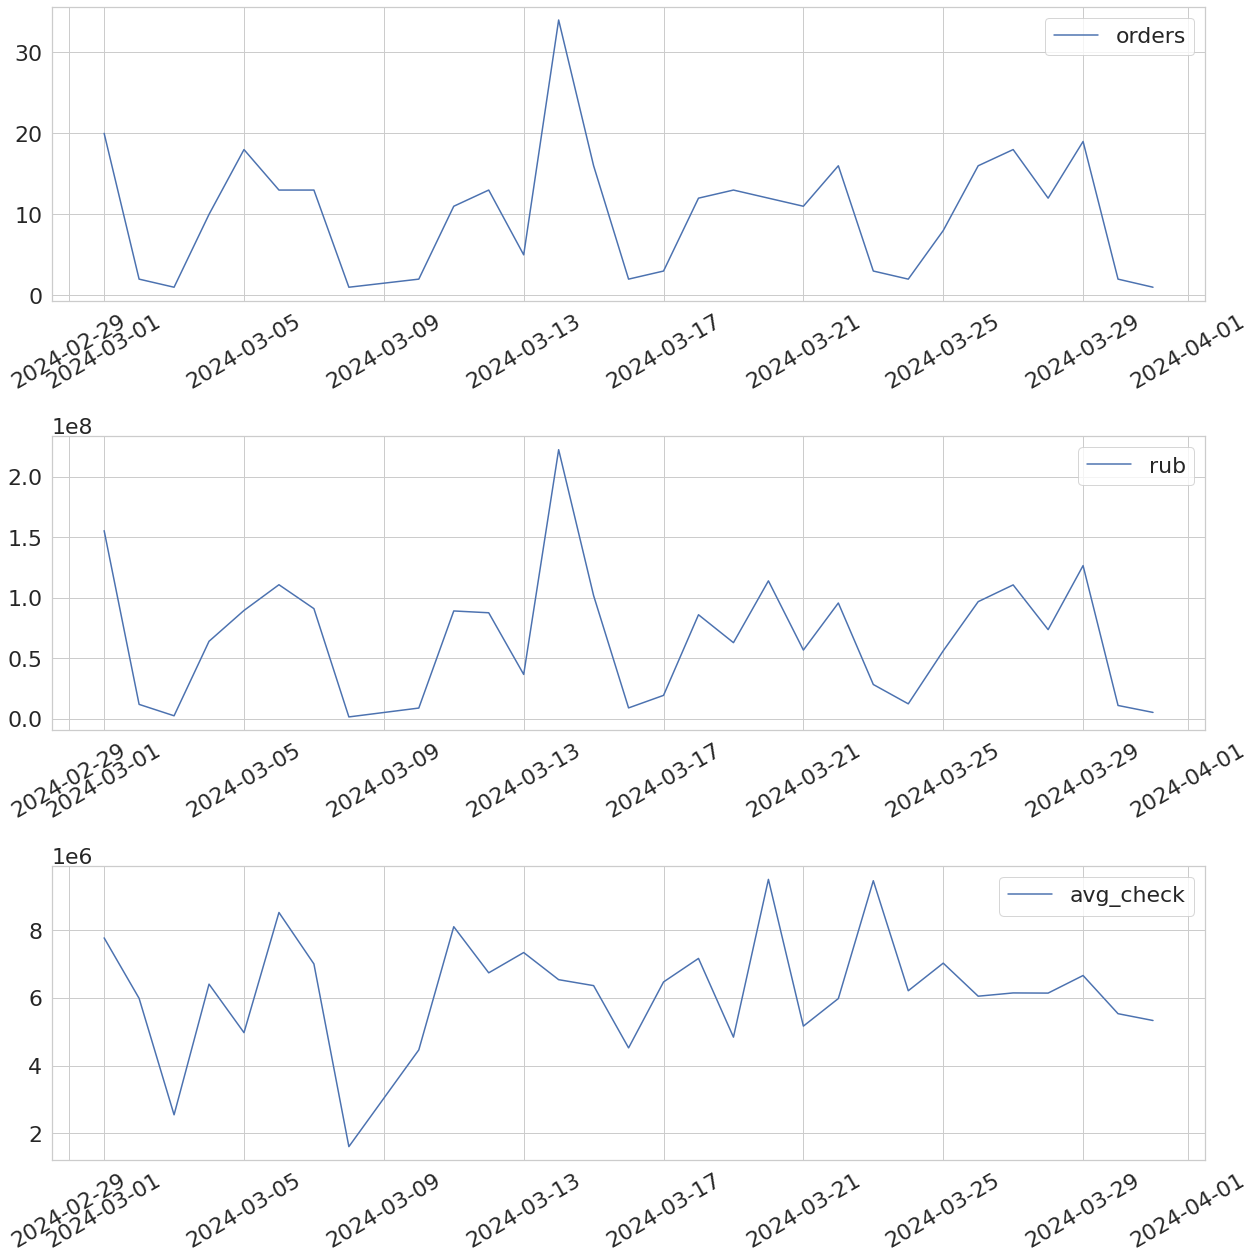

In [37]:
metrics = ['orders', 'rub', 'avg_check']

fig, axes = plt.subplots(3, 1, figsize=(18, 18))

for i, metric in enumerate(metrics):
    df = df_report_by_date[['date', metric]].set_index('date')
    sns.lineplot(data=df, ax=axes[i]);
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel('')

plt.tight_layout();

## Выводы, полученные в результате анализа графиков:

1.  **Число заказов и выручка изменяются разнонаправлено** - в некоторые дни при росте количества заказов выручка падает, и наоборот.

2.  **Средний чек и выручка также демонстрируют разнонаправленную динамику** - увеличение среднего чека не всегда приводит к росту выручки в тот же день.

3.  **День с максимальным числом заказов не является лидером по выручке и среднему чеку** - пиковое количество заказов не гарантирует максимальные финансовые показатели.

4.  **Выручка имеет волнообразный характер** - в течение месяца наблюдаются периоды роста и снижения выручки.

5.  **Средний чек нестабилен на протяжении месяца** - показатель постоянно колеблется, не проявляя устойчивой тенденции к росту или падению.

## Проанализируем интерес клиентов к брендам

**Анализ востребованности брендов среди клиентов:**

1.  **Создадим колонку `brand`** в датафрейме `df_full`, извлекая название бренда из названий товаров

2.  **Посчитаем общее количество уникальных брендов**, которые интересовали клиентов (учитываются все записи о заказах независимо от статуса)

3.  **Проанализируем распределение заказов** по различным брендам для выявления наиболее и наименее востребованных

In [38]:
df_full['brand'] = df_full['name'].str.split(',').str[0]

In [39]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,rate,сurrency,rub,brand
0,ABID-18767701,72,30,Маргарита Камертонова,2024-03-11,44,confirmed,72,"Beyerdynamic, DT 990 PRO",158.91,Проводные наушники,90.7493,Доллар США\n,432629.137890,Beyerdynamic
1,ABID-18767701,509,40,Маргарита Камертонова,2024-03-11,44,confirmed,509,"Heco, Stay 300",43.95,Проводные наушники,90.7493,Доллар США\n,159537.269400,Heco
2,ABID-18767701,555,26,Маргарита Камертонова,2024-03-11,44,confirmed,555,"JBL, Charge 4",159.13,Беспроводная акустика,90.7493,Доллар США\n,375464.338834,JBL
3,ABID-18767701,557,30,Маргарита Камертонова,2024-03-11,44,confirmed,557,"JBL, Xtreme 2",308.70,Беспроводная акустика,90.7493,Доллар США\n,840429.267300,JBL
4,ABID-18767701,569,28,Маргарита Камертонова,2024-03-11,44,confirmed,569,"JBL, Live 650BTNC",178.47,Беспроводные наушники,90.7493,Доллар США\n,453488.771988,JBL


**Количество уникальных брендов, которыми интересовались пользователи**

In [40]:
df_full.brand.nunique()

121

**Анализ эффективности брендов по выручке и количеству заказов:**

1.  **Посчитаем для каждого бренда:**
    - Суммарную выручку в рублях (только подтвержденные заказы)
    - Количество подтвержденных заказов с товарами этого бренда

2.  **Определим бренд-лидер по выручке** и укажем его название

3.  **Проанализируем соотношение** выручки и количества заказов:
    - Проверим, лидирует ли бренд-лидер по выручке также и по количеству заказов
    - Или же бренд реже заказывается, но на более крупные суммы (высокий средний чек)

In [41]:
df_brands = df_full.groupby('brand', as_index = False)\
    .agg({'rub':'sum', 'order_id':'nunique'})\
    .rename(columns={'order_id':'orders'})\
    .sort_values('orders', ascending = False)
df_brands.head()

,brand,rub,orders
46,JBL,3.080112e+08,297
43,Heco,2.632046e+08,256
120,Yamaha,1.798673e+08,244
53,Klipsch,2.205107e+08,229
62,Magnat,1.300969e+08,172


**Бренд по выручке**: JBL

In [42]:
df_brands.sort_values('orders', ascending=False).head(1)

,brand,rub,orders
46,JBL,3.080112e+08,297


**Бренд оказался рекордсменом и по выручке, и по числу заказов**

## Анализ востребованности товаров:

1.  **Создадим список уникальных ID товаров** из датафрейма `df_full_conf` (подтвержденные заказы)

2.  **Добавим колонку `is_in_orders` в датафрейм `df_products`** со значениями:
    - `yes` - если товар был заказан
    - `no` - если товар не был заказан

3.  **Посчитаем количество товаров:**
    - Заказанных товаров 
    - Незаказанных товаров

**Результат анализа покажет**, какая доля товарного ассортимента фактически востребована клиентами, а какие товары не пользуются спросом.

In [43]:
products_in_orders = df_full_conf['product_id'].unique()
products_in_orders

array([  72,  509,  555, ..., 1484,  223,  656])

In [44]:
df_products['is_in_orders'] = df_products['id'].apply(lambda x: 'yes' if x in products_in_orders else 'no')
df_products.head()

,id,name,price,category,is_in_orders
0,1,"AKG, D5",180.46,Динамический микрофон,no
1,2,"AKG, D40",85.80,Динамический микрофон,yes
2,3,"AKG, C414 XLII",935.11,Конденсаторный микрофон,no
3,4,"AKG, C214",356.02,Конденсаторный микрофон,yes
4,5,"AKG, P120",86.13,Конденсаторный микрофон,no


In [45]:
df_products['is_in_orders'].value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

**Анализ брендов с низкой востребованностью товаров:**

1.  **Сгруппируем данные по брендам** и посчитаем для каждого:
    - Общее количество товаров (только бренды с ≥15 товарами)
    - Количество незаказанных товаров (is_in_orders = 'no')
    - Долю незаказанных товаров

2.  **Выделим бренды-проблемы** - те, у которых доля незаказанных товаров превышает 50%

3.  **Проанализируем полученный список** брендов с низкой востребованностью ассортимента

In [46]:
df_products['brand'] = df_products['name'].str.split(',').apply(lambda x: x[0])

brands_no_orders = df_products.groupby(['brand', 'is_in_orders'], as_index=False)\
                            .aggregate({'id': 'nunique'})\
                            .rename(columns={'id':'products'})
brands_no_orders.head()

,brand,is_in_orders,products
0,AKG,no,6
1,AKG,yes,5
2,ART,yes,1
3,ASUS,no,1
4,ASUS,yes,2


In [47]:
brands_no_orders_pivot = brands_no_orders.pivot(index='brand', columns='is_in_orders', values='products')\
                                        .fillna(0)\
                                        .reset_index()
brands_no_orders_pivot.head()

is_in_orders,brand,no,yes
0,AKG,6.0,5.0
1,ART,0.0,1.0
2,ASUS,1.0,2.0
3,Adam Audio,1.0,0.0
4,Amazon,0.0,4.0


In [48]:
brands_no_orders_pivot['total'] = brands_no_orders_pivot['no'] + brands_no_orders_pivot['yes']
brands_no_orders_pivot['no_ratio'] = brands_no_orders_pivot['no'] / brands_no_orders_pivot['total']
brands_no_orders_pivot.head()

is_in_orders,brand,no,yes,total,no_ratio
0,AKG,6.0,5.0,11.0,0.545455
1,ART,0.0,1.0,1.0,0.000000
2,ASUS,1.0,2.0,3.0,0.333333
3,Adam Audio,1.0,0.0,1.0,1.000000
4,Amazon,0.0,4.0,4.0,0.000000


In [49]:
brands_no_orders_pivot.query('total > 15 and no_ratio > 0.5').brand.to_list()

['Dali', 'KEF', 'Marantz', 'Pioneer']

##  В результате получили список брендов, у которых с низким спросом, у которых более 50% товаров не были ни разу заказаны

## Анализ эффективности менеджеров по итогам месяца:

1.  **Посчитаем для каждого менеджера:**
    - Количество подтвержденных заказов и их долю от общего числа заказов (%)
    - Суммарную выручку и её долю от общей выручки (%)
    
2.  **Визуализируем результаты** для наглядного сравнения вклада каждого менеджера


In [50]:
df_managers = df_full_conf.groupby('manager', as_index = False)\
    .agg({'order_id': 'nunique', 'rub' : 'sum'})\
    .rename(columns={'order_id':'orders'})\
    .sort_values('rub', ascending=False)

In [51]:
df_managers

,manager,orders,rub
9,Маргарита Камертонова,48,3.473886e+08
4,Виктор Тромбонов,50,3.188999e+08
8,Максим Барабанов,40,2.401478e+08
5,Владимир Ударников,31,2.084865e+08
0,Алексей Саксофонов,27,1.953435e+08
7,Ксения Балалайкина,27,1.817621e+08
6,Екатерина Тарелкина,28,1.781576e+08
10,Надежда Гармошкина,21,1.347836e+08
1,Анастасия Дудкина,20,1.234504e+08
2,Антон Скрипкин,7,5.150268e+07


In [52]:
df_managers['%rub'] = round(df_managers['rub'] / df_managers['rub'].sum() * 100, 2)
df_managers['%orders'] = round(df_managers['orders'] / df_managers['orders'].sum() * 100, 2)
df_managers

,manager,orders,rub,%rub,%orders
9,Маргарита Камертонова,48,3.473886e+08,17.04,15.53
4,Виктор Тромбонов,50,3.188999e+08,15.65,16.18
8,Максим Барабанов,40,2.401478e+08,11.78,12.94
5,Владимир Ударников,31,2.084865e+08,10.23,10.03
0,Алексей Саксофонов,27,1.953435e+08,9.58,8.74
7,Ксения Балалайкина,27,1.817621e+08,8.92,8.74
6,Екатерина Тарелкина,28,1.781576e+08,8.74,9.06
10,Надежда Гармошкина,21,1.347836e+08,6.61,6.80
1,Анастасия Дудкина,20,1.234504e+08,6.06,6.47
2,Антон Скрипкин,7,5.150268e+07,2.53,2.27


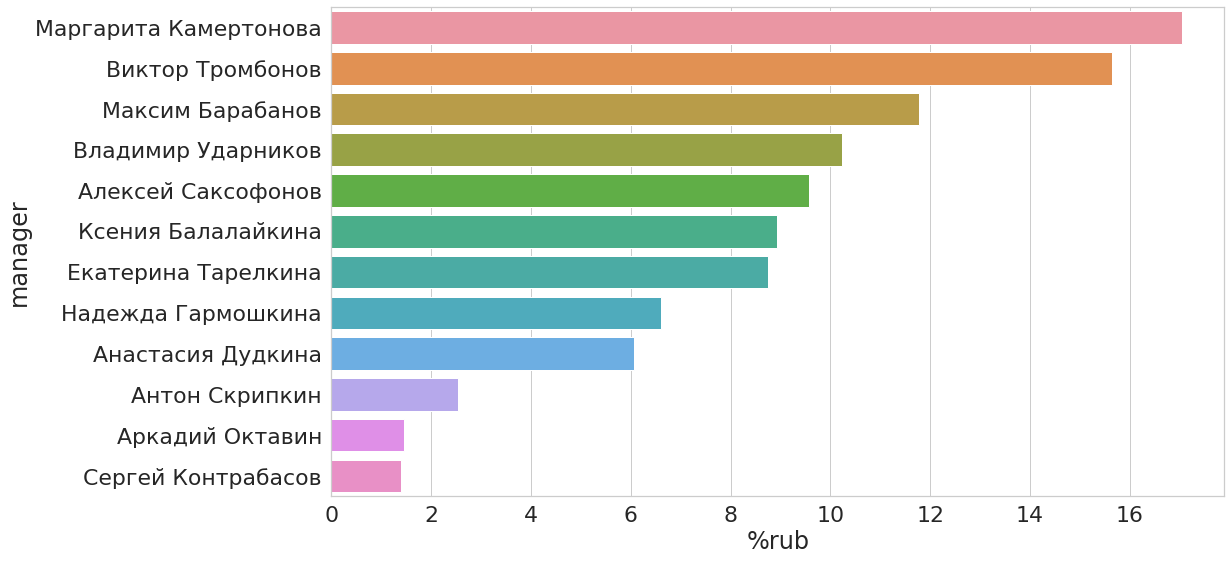

In [53]:
sns.barplot(data = df_managers, x = '%rub', y = 'manager')

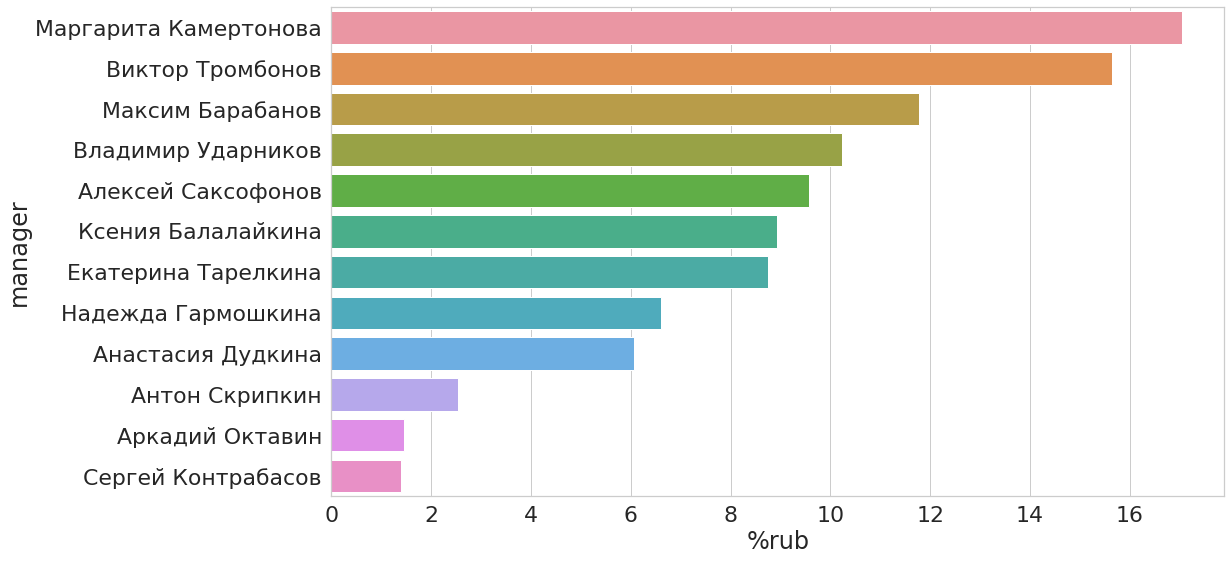

In [54]:
sns.barplot(data = df_managers, x = '%rub', y = 'manager')

## Результаты анализа эффективности менеджеров:

1.  **Лучший менеджер по выручке:** Маргарита Камертонова показала наивысший процент выручки

2.  **Лидер по количеству заказов:** Менеджер реализовал более 16% от общего числа заказов

3.  **Наихудшие показатели:** Сергей Контрабасов демонстрирует самые низкие результаты

4.  **Сравнение показателей:** Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина, что свидетельствует о значительном разрыве в эффективности между менеджерами